# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


Email           7465
Call            4961
Email + Call    2572
Name: sales_method, dtype: int64


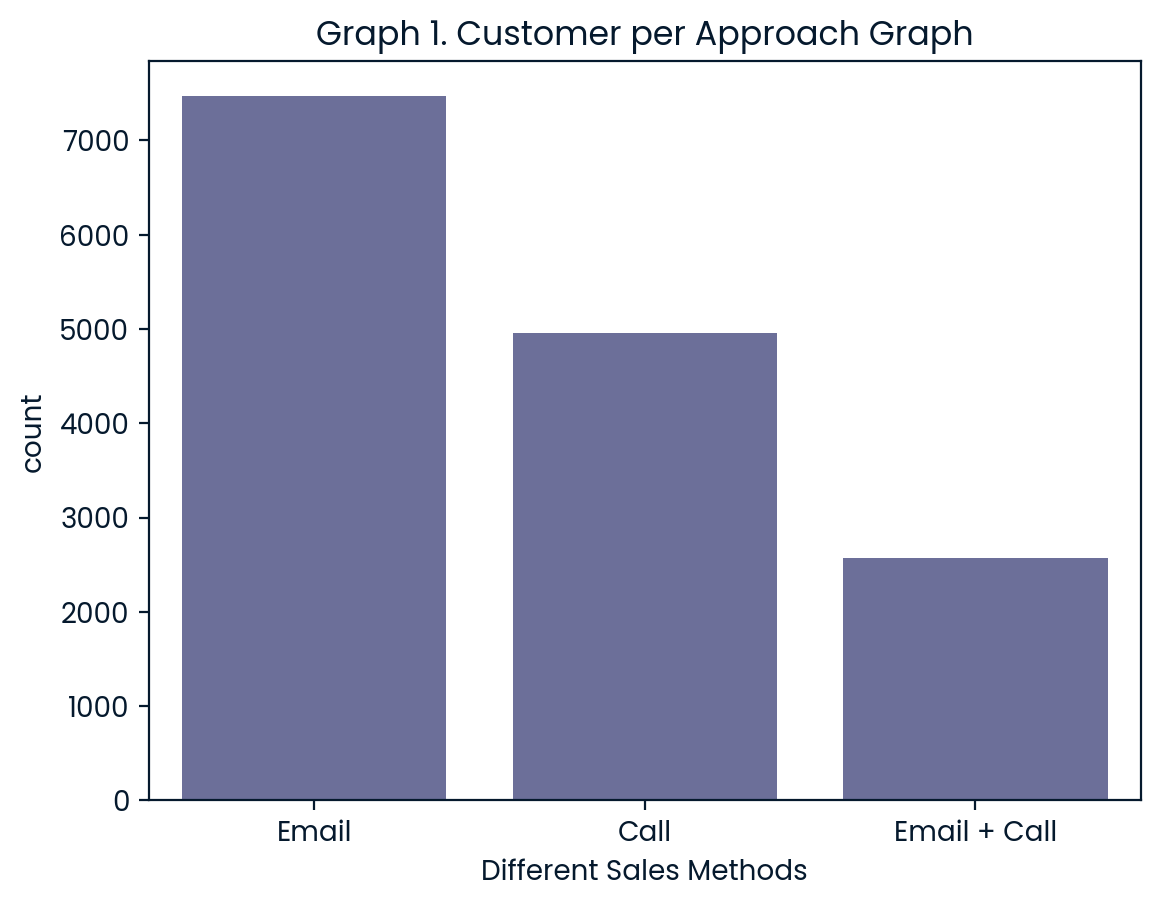

In [21]:
# Q1 : How many customers were there for each approach?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing the file to analyze
ps = pd.read_csv("product_sales.csv")

# cleaning our data before analysis
ps['sales_method'] = ps['sales_method'].replace({
    "em + call":"Email + Call",
    "email":"Email"
})
# Since the revenue distribution is right-skewed, I imputed missing values with the median rather than the mean, as the median is a more reliable central measure in skewed data
ps['revenue'] = ps['revenue'].astype(float) #making sure all values are indeed numeric before cleaning
ps['revenue'] = ps['revenue'].fillna(ps['revenue'].median()) 
ps = ps[ps['years_as_customer'] <=39]

# answering first question of : how many customers were there for each approach
num_of_cust = ps['sales_method'].value_counts()
print(num_of_cust)
# im using order here to have have better storytelling, this graph clearly showcases that Email is by far the most popular and Email + Call is the least
order = ps['sales_method'].value_counts().index
sns.countplot(data=ps,x='sales_method', order=order)
plt.title("Graph 1. Customer per Approach Graph")
plt.xlabel("Different Sales Methods")
plt.savefig("Graph 1. Customer per Approach Graph.png")

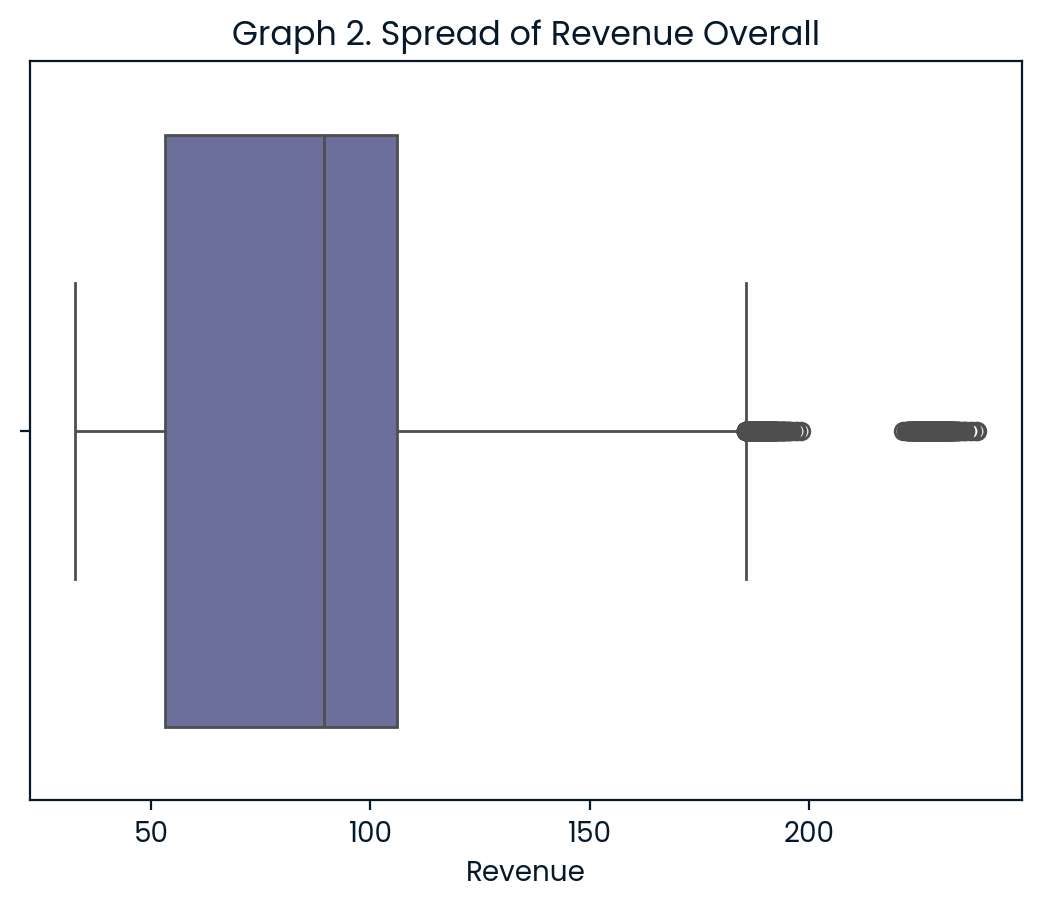

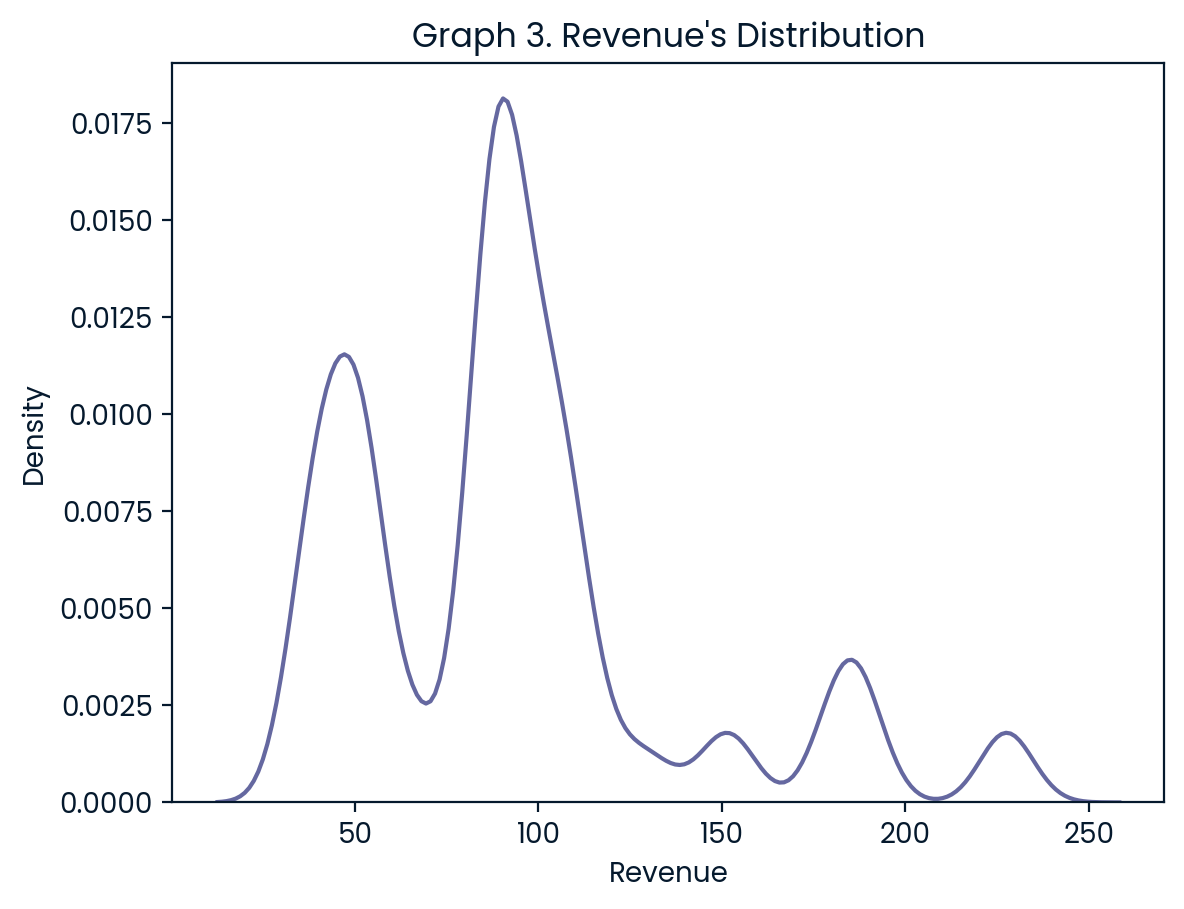

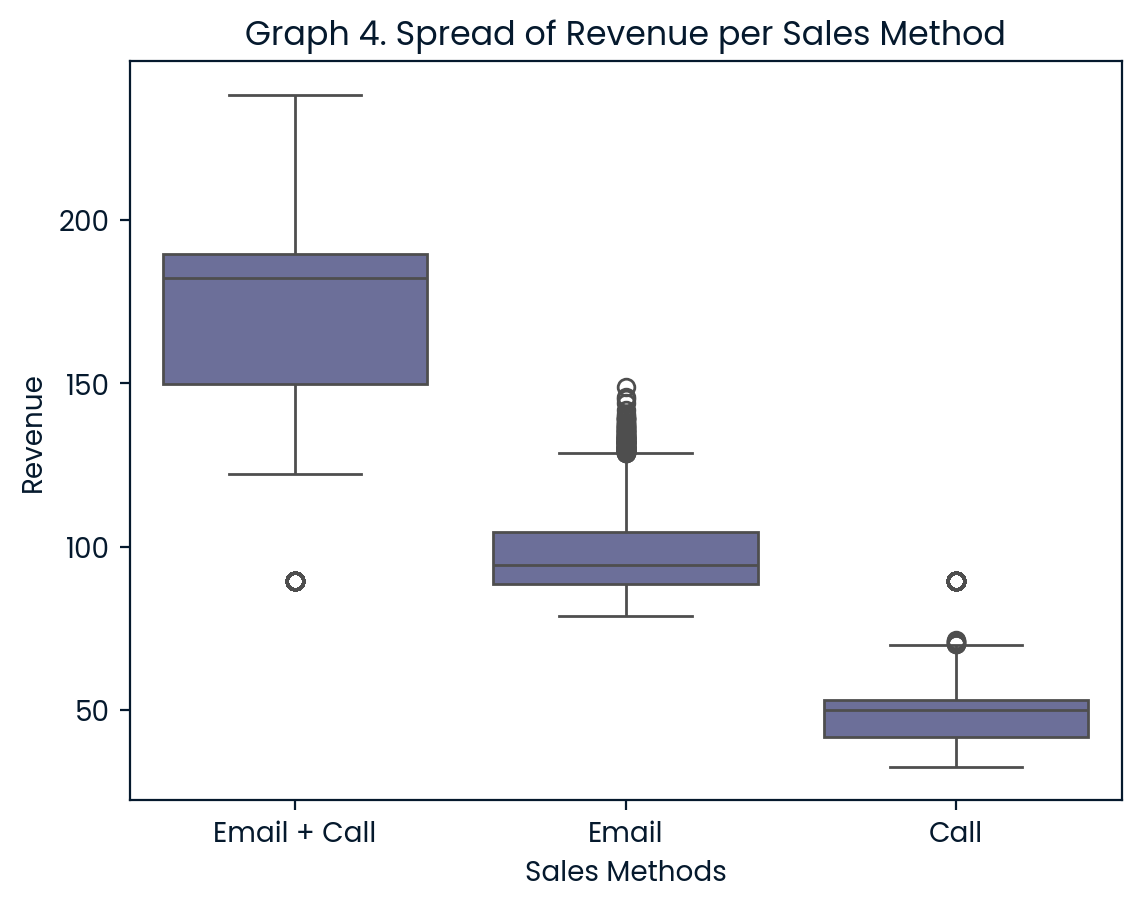

In [22]:
# Q2 : What does the spread of the revenue look like overall? And for each method?
# boxplot to visualize spread of revenue overall and revenue per sales method

# revenue overall
sns.boxplot(data=ps, x='revenue')
plt.title("Graph 2. Spread of Revenue Overall")
plt.xlabel("Revenue")
plt.savefig("Graph 2. Spread of Revenue Overall.png")
plt.show()

# I wan't to visualize distrbiution here as well for further analysis
sns.kdeplot(data=ps, x='revenue')
plt.title("Graph 3. Revenue's Distribution")
plt.xlabel("Revenue")
plt.savefig("Graph 3. Revenue's Distribution.png")
plt.show()

# we can see that the distribution is right-skewed which is tied back to the cleaning section of Q1

# revenue per method
per_method_order = ( ps.groupby('sales_method')['revenue']
                     .sum()
                     .index
                     .sort_values(ascending=False)
)
sns.boxplot(data=ps, x='sales_method', y='revenue', order=per_method_order)
plt.title("Graph 4. Spread of Revenue per Sales Method")
plt.xlabel("Sales Methods")
plt.ylabel("Revenue")
plt.savefig("Graph 4. Spread of Revenue per Sales Method.png")
plt.show()


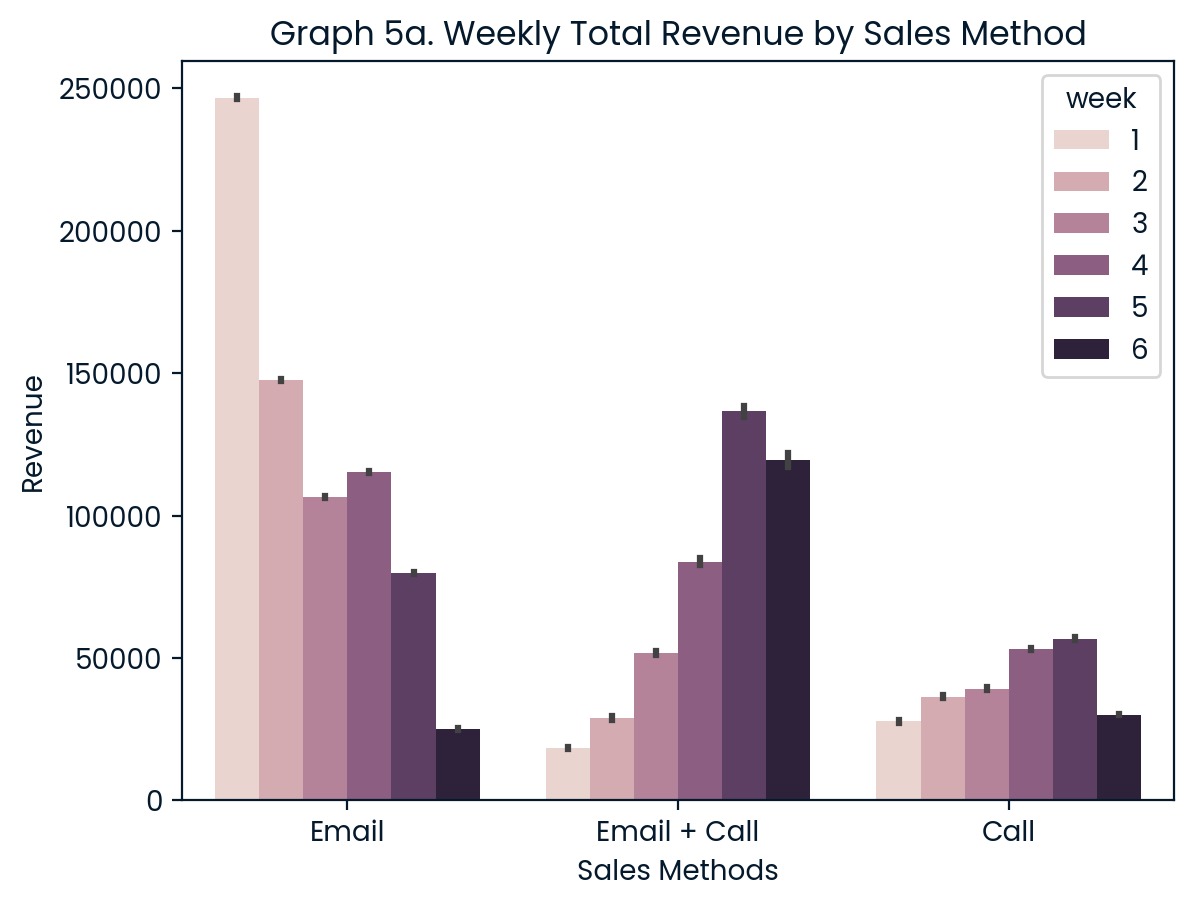

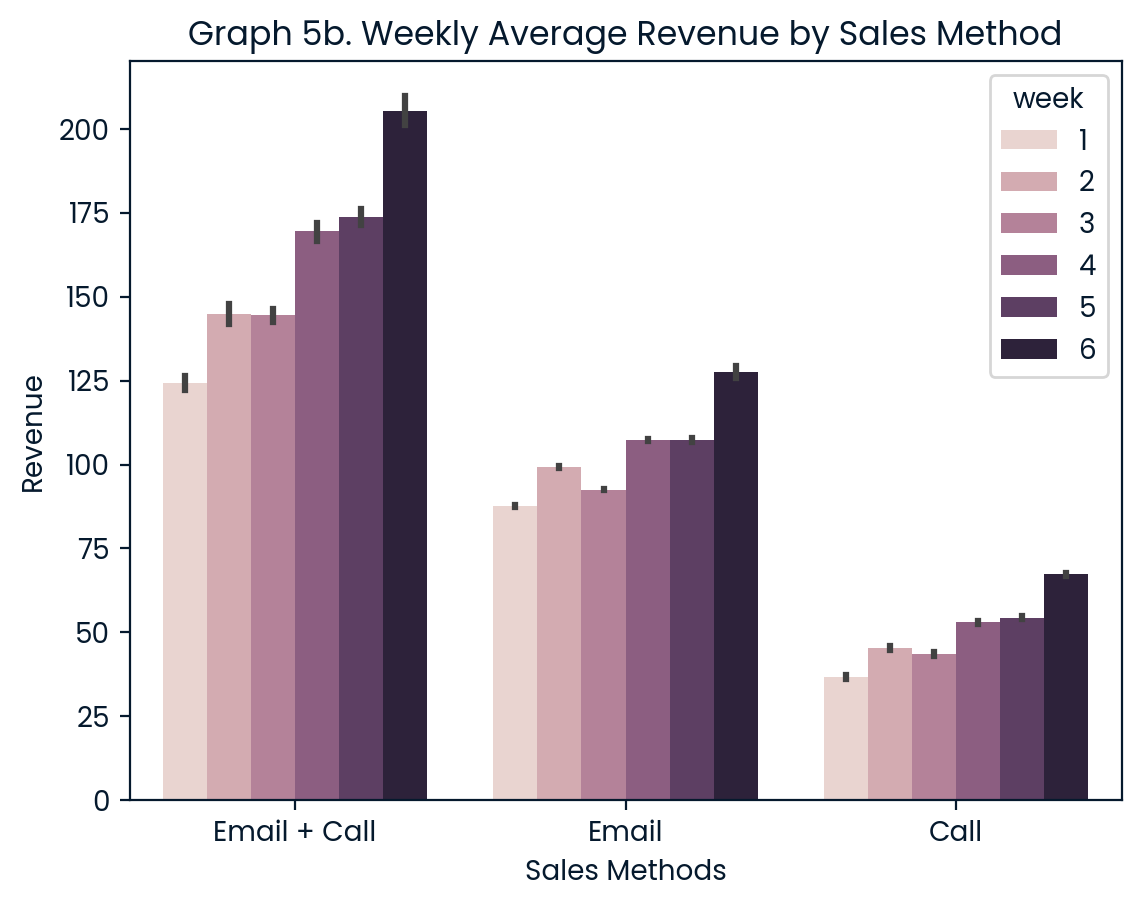

In [23]:
# Q3 : Was there any difference in revenue over time for each of the methods?

# visualization (TOTAL)
diff_over_weeks =( ps.groupby('sales_method')['revenue']
                       .sum()
                       .sort_values(ascending=False)
                       .index
)
# Graph A(TOTAL) showcasing TOTAL revenue per week
sns.barplot(data=ps, x='sales_method', y='revenue', hue='week', order=diff_over_weeks, estimator=sum)
plt.title("Graph 5a. Weekly Total Revenue by Sales Method")
plt.xlabel("Sales Methods")
plt.ylabel("Revenue")
plt.savefig("Graph 5a. Weekly Total Revenue by Sales Method.png")
plt.show()


# visualization (AVERAGE)
diff_over_weeks =( ps.groupby('sales_method')['revenue']
                       .mean()
                       .sort_values(ascending=False)
                       .index
)
#Graph B(AVG) showcasing AVG revenue per week
sns.barplot(data=ps, x='sales_method', y='revenue', hue='week', order=diff_over_weeks)
plt.title("Graph 5b. Weekly Average Revenue by Sales Method")
plt.xlabel("Sales Methods")
plt.ylabel("Revenue")
plt.savefig("Graph 5b. Weekly Average Revenue by Sales Method.png")
plt.show()


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

**Data Validation**

Before I did any analysis, I cleaned up the dataset so it made sense:

- sales_method: There were a couple of messy labels (like em + call and lowercase email). I fixed them so everything is consistent: Email, Call, and Email+Call.
  
- revenue: Some rows were missing revenue numbers. Since the revenue data is right-skewed (a few customers spend a lot more than others), I filled those gaps with the median instead of the mean. That way the missing values don’t throw things off.
  
- years_as_customer: A few entries were over 39 years, which isn’t possible since the company started in 1984. I removed those rows.
  
- Other columns: Looked fine after a quick check, so I left them as they were.

**Exploratory Analysis**

**Graph 1. Customers per Sales Method**
Email brought in the most customers, followed by Call, then Email+Call. So Email clearly casts the widest net, but having more customers doesn’t always mean higher revenue.

**Graph 2. Spread of Revenue Overall
Graph 3. Spread of Revenue per Sales Method**
Looking at revenue overall, it’s right-skewed with a handful of big spenders. By method, Email+Call stands out: it has the highest median revenue and the widest spread, which suggests it can land bigger deals. Email-only is steadier but tends to stay lower, and Call is generally the weakest.

**Graphs 5a & 5b. Revenue Over Time by Sales Method**
I looked at revenue two ways.

- Graph 5a shows total revenue per week. Email starts strong in Week 1 but drops off fast. Email+Call keeps building week after week and eventually comes out on top. Call is flat and stays the lowest.
  
- Graph 5b shows average revenue per customer. The trend is basically the same: Email+Call grows steadily, Email spikes then dips, and Call doesn’t move much.

Having both views helps. Totals show the overall business impact, while averages show how effective each method is on a per-customer basis.

**Metric to Monitor**

The main metric the business should track is weekly revenue by sales method.

- This helps compare which approach is actually delivering money, not just customer volume.
  
- Baseline from this dataset:

- Email+Call was the clear winner by Week 6.
  
- Email-only had the most customers but less revenue per customer.
  
- Call took the most time and gave the least revenue back.

**Final Summary & Recommendations**

Based on the data:

- Go with Email+Call: It consistently brought in the most revenue, and the extra 10-minute follow-up call is worth it.
  
- Keep Email-only: It’s cheap and fast for reaching lots of people, but needs upselling to really pay off.
  
- Cut back on Call-only: It takes ~30 minutes per customer but doesn’t bring in enough money to justify the effort.
  
- Bottom line: Use Email+Call as the main sales method, back it up with Email for volume, and stop putting too much time into pure Call campaigns.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation